# NETFLIX MOVIES & TV SHOWS EXPLORATORY DATA ANALYSIS

## QUADRI ALLI

In [43]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'

In [44]:
for text in pio.renderers:
    print(text)
    pio.renderers.default = text

plotly_mimetype
jupyterlab
nteract
vscode
notebook
notebook_connected
kaggle
azure
colab
cocalc
databricks
json
png
jpeg
jpg
svg
pdf
browser
firefox
chrome
chromium
iframe
iframe_connected
sphinx_gallery
sphinx_gallery_png


In [3]:
df = pd.read_csv('netflix_titles.csv')
df["date_added"]= pd.to_datetime(df["date_added"].str.strip(), format="%B %d, %Y")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [24]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [25]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<AxesSubplot: >

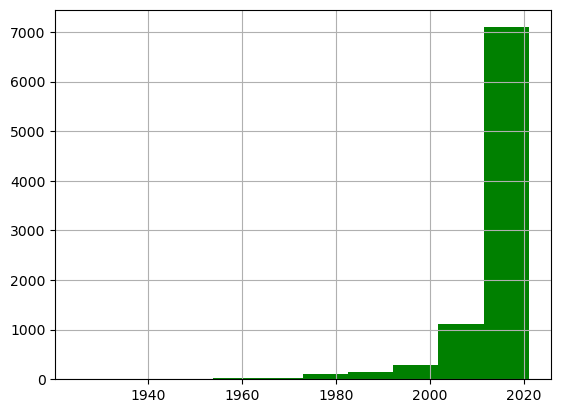

In [26]:
df["release_year"].hist(color='green') #matplotlib graph

## Analyzing the amount of movies uploaded per year to gain upload insights.
### There was a peak of Uploads in 2018 but it has since dropped gradually.

In [27]:
#Plotly for better and detailed visualization of the count of movies upload per year.
px.histogram(df, x='release_year')

<AxesSubplot: >

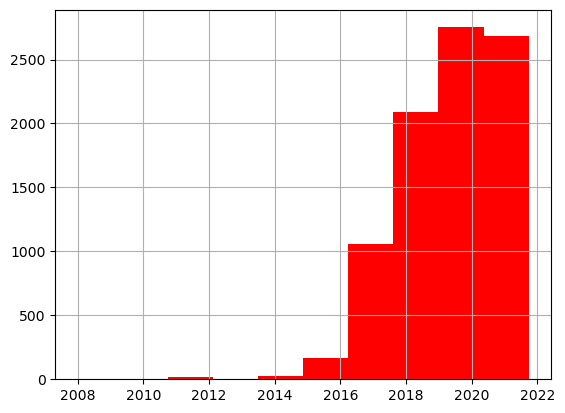

In [32]:
df["date_added"].hist(color='red')

In [5]:
#Month analysis
df['date_month'] = df['date_added'].dt.month.fillna(0)


## Is there a specific month in which Netflix likes to upload?
### Data seems to show monthly uploads are random.

In [28]:
px.histogram(df, x='date_added', color ='date_month') #Plotly for better and detailed visualization for dates,specifically months within the year when netflix likes to upload.

In [11]:
#Date Analysis
df['date_day'] = df['date_added'].dt.day.fillna(0)

## Is there a specific Day of the month Netflix Prefers to Upload?
### Yes, 1st day of the month followed by the middle of the month, which is the 15th. 

In [29]:
#Plotly for better and detailed visualization for specific day of the month netflix likes to upload movies or shows.
#Mostly 1st day and the middle of the month. 
px.histogram(df, x='date_day', color ='date_day') 

In [46]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_month', 'date_day'],
      dtype='object')

In [50]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

## Movie to Tv Show ratio
### There's an enormous amount of movies on netflix compared to shows.

In [30]:
px.histogram(df, x='date_added', color ='type')

## What countries has the most uploads on Netlix?
### US, UK, France are top 3

In [53]:
df["country"].str.split(',', expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11
0,United States,None,None,None,None,None,None,None,None,None,None,None
1,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,United States,None,None,None,None,None,None,None,None,None,None,None
8803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8804,United States,None,None,None,None,None,None,None,None,None,None,None
8805,United States,None,None,None,None,None,None,None,None,None,None,None


In [9]:
count_country = df.copy()
count_country = pd.concat([count_country, df["country"].str.split(',', expand=True)], axis=1)
count_country = count_country.melt(id_vars=['type','title'], value_vars=range(12), value_name='Country')
count_country = count_country[count_country['Country'].notna()]
count_country['Country'] = count_country['Country'].str.strip()
count_country

,type,title,variable,Country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


In [31]:
px.histogram(count_country, x='Country', color = 'type').update_xaxes(categoryorder='total descending')

<AxesSubplot: >

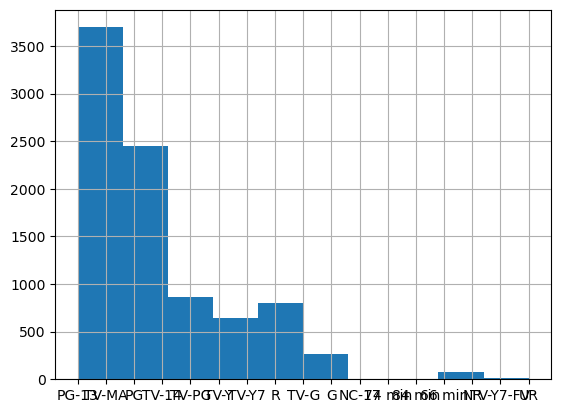

In [32]:
df['rating'].hist()

## Rating Analysis

In [79]:
px.histogram(df,'rating').update_xaxes(categoryorder='total descending')

### Cast Count Analysis

In [37]:
df['cast count'] = df['cast'].str.split(",")
df = df[df["cast count"].notna()]
df['cast count'] = df['cast count'].apply(lambda x: len(x))
df

/var/folders/fy/8zdrzg6s257dps6bmys5m3h00000gn/T/ipykernel_19352/348002146.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_month,date_day,cast count
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24.0,19
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,24.0,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,24.0,8
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9.0,24.0,16
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9.0,24.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,3.0,9.0,6
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11.0,20.0,10
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11.0,1.0,7
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1.0,11.0,9


In [38]:
px.histogram(df,'cast count').update_xaxes(categoryorder='total descending')

### Director Analysis

In [36]:
new_df = df['director'].value_counts().sum
new_df
px.histogram(df, x='director').update_xaxes(categoryorder='total descending')
